In [1]:
%matplotlib inline
from IPython.display import display, HTML
from analysis import Analysis
from models import *
analysis = Analysis('passengers', title='01-Basic', logger=display, normalize=True, percent_train=0.67)
analysis.load_data()

//anaconda/envs/python35/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now setting the features and predictor to just be the avg temperature value.

In [2]:
predictor = 'num_passengers'
features = [predictor]
analysis.set_feature_predictor_columns(features, predictor)
analysis.train_test_split()

'Number of train data points: 96'

'Number of test data points: 48'

Set some parameters that are used by some of the models

In [3]:
# The number of days to chunk inputs by
NUM_DAYS = 3

# 
NUM_FEATURES = len(analysis.features)

Going to try each different model.

# Raw Data

Raw Data means that the model simply takes the data as a sequence and no data manipulation is performed.

## ARIMA

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=613.331, BIC=626.100, Fit time=0.283 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=611.263, BIC=621.478, Fit time=0.162 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=611.910, BIC=622.126, Fit time=0.156 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=613.411, BIC=621.073, Fit time=0.056 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=613.110, BIC=625.879, Fit time=0.468 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=613.185, BIC=625.954, Fit time=0.259 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=612.372, BIC=627.696, Fit time=1.105 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=613.612, BIC=621.273, Fit time=0.105 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 1, 0, 12);

'Train Error (RMSE): 16.30197751864763  Num NaN: 0'

'Test Error (RMSE): 43.88078922462065    Num NaN: 0'

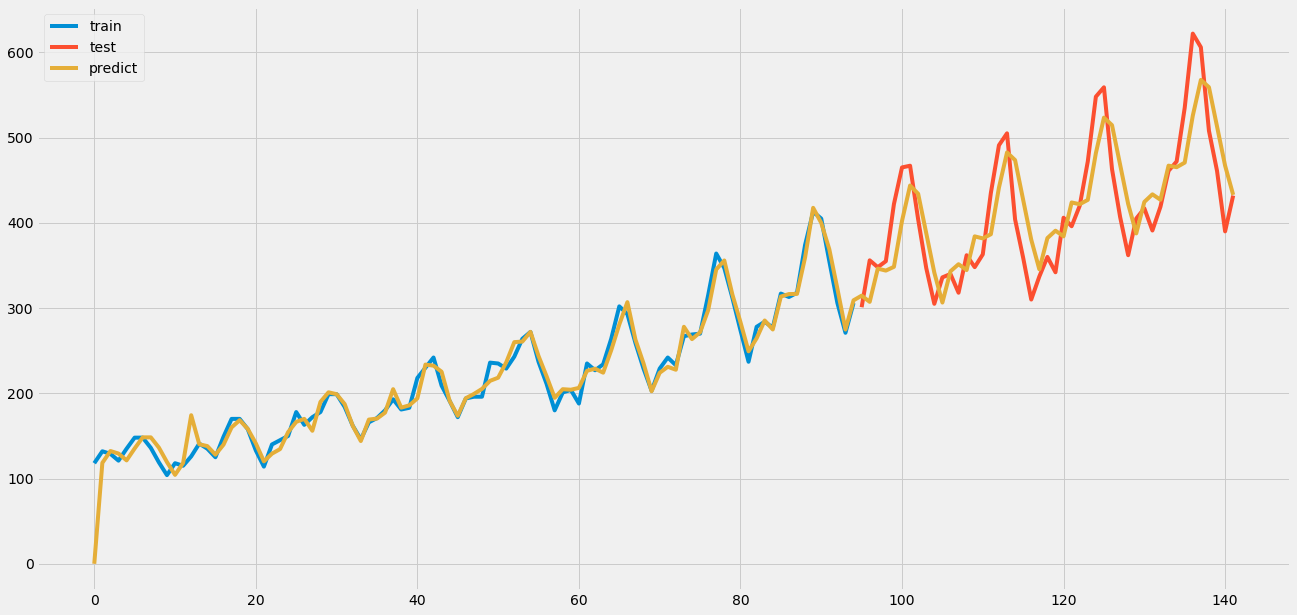

In [4]:
model = ARIMA(analysis=analysis, use_features=False)
analysis.run_model(model, name='ARIMA')

'Train Error (RMSE): 22.645952351242304  Num NaN: 0'

'Test Error (RMSE): 93.04922513311082    Num NaN: 0'

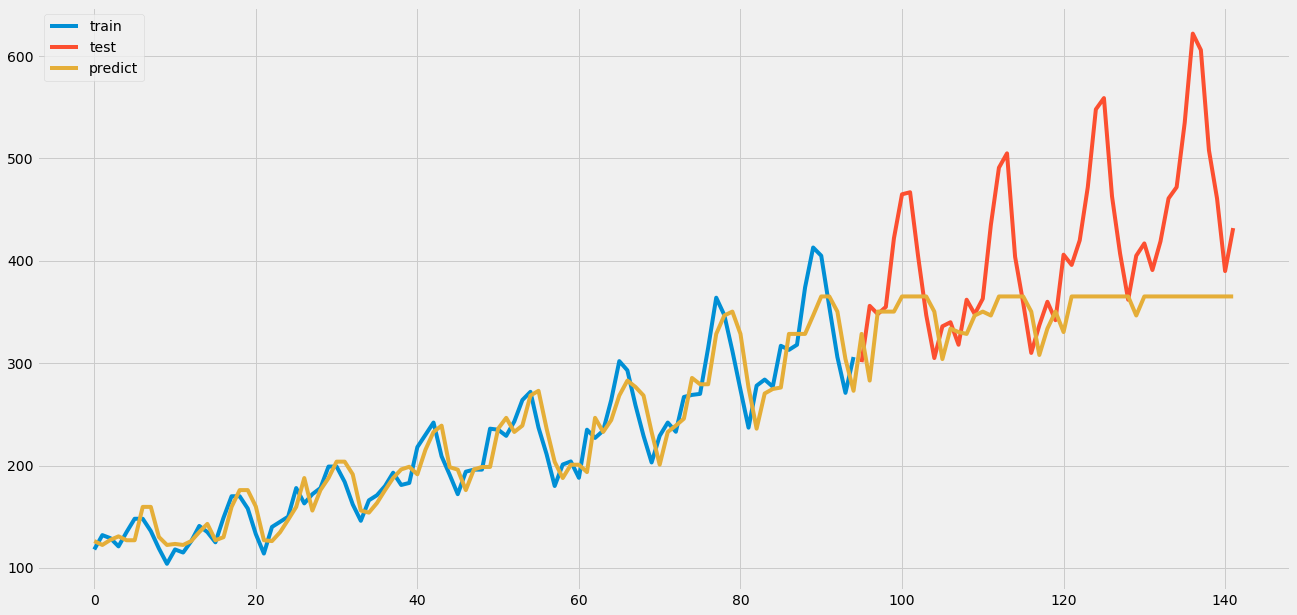

In [5]:
from sklearn.neighbors import KNeighborsRegressor
model = Regressor(analysis=analysis, regressor=KNeighborsRegressor)
analysis.run_model(model, name='KNN')

//anaconda/envs/python35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


'Train Error (RMSE): 83.28809758901279  Num NaN: 0'

'Test Error (RMSE): 246.1350681069485    Num NaN: 0'

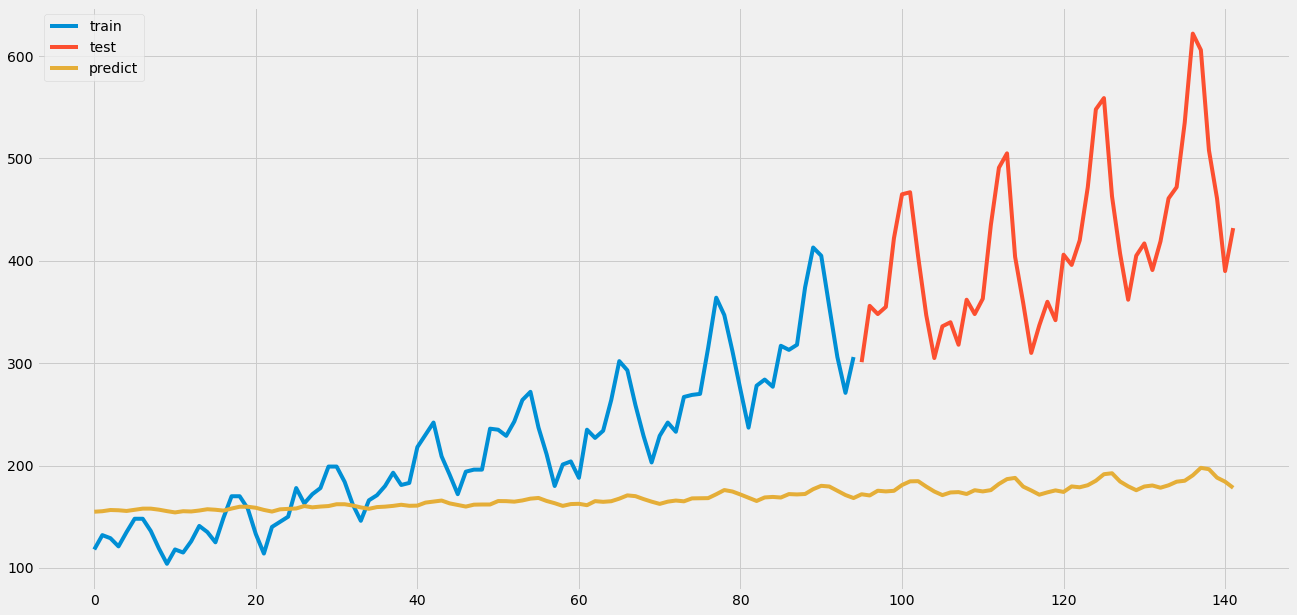

In [6]:
from sklearn.linear_model import SGDRegressor
model = Regressor(analysis=analysis, regressor=SGDRegressor)
analysis.run_model(model, name='SGD')

'Train Error (RMSE): 12.256727303048171  Num NaN: 0'

'Test Error (RMSE): 75.52503178107186    Num NaN: 0'

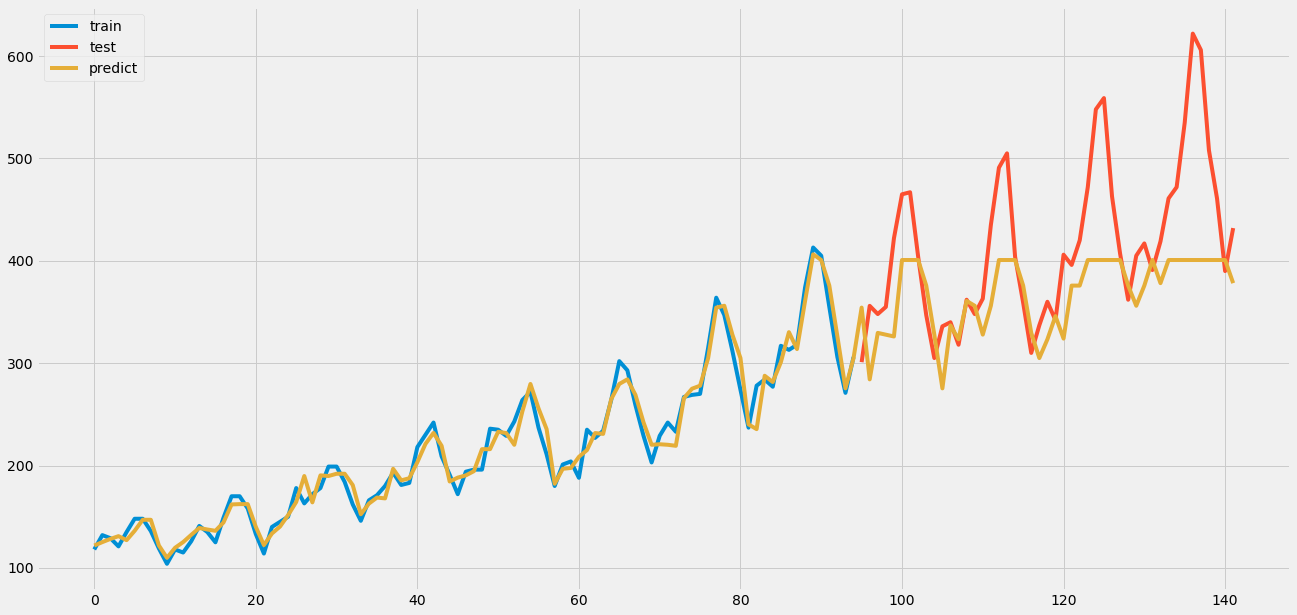

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = Regressor(analysis=analysis, regressor=RandomForestRegressor)
analysis.run_model(model, name='RandomForest')

'Train Error (RMSE): 19.58224592265251  Num NaN: 0'

'Test Error (RMSE): 84.28155619211773    Num NaN: 0'

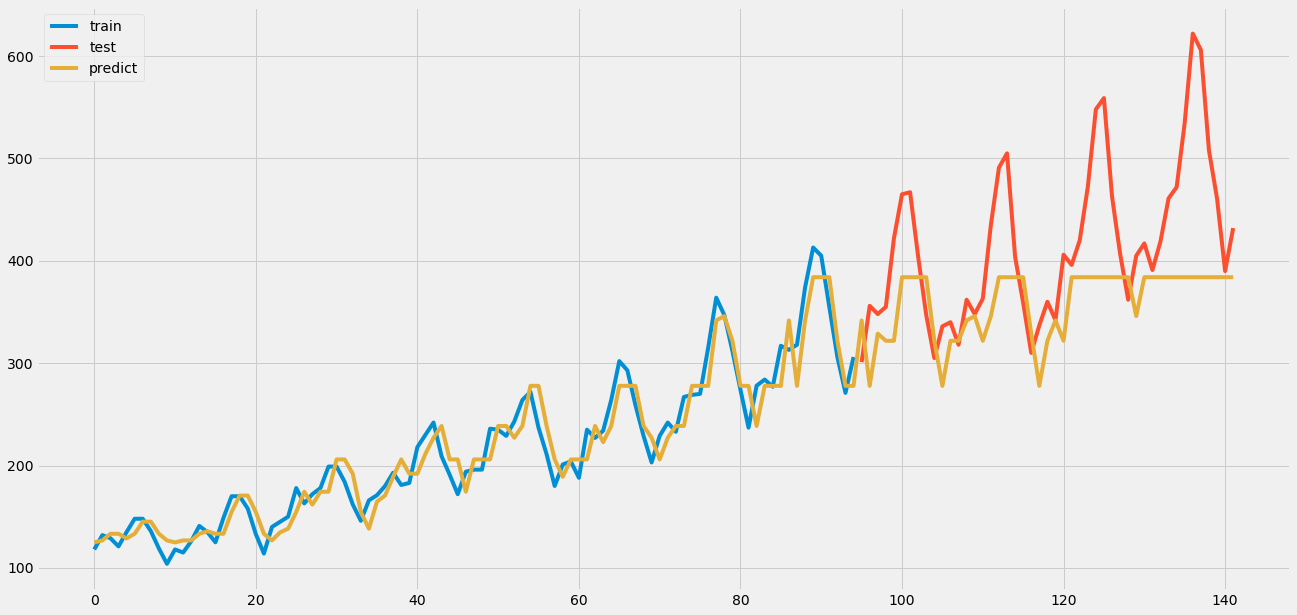

In [8]:
from sklearn.ensemble import AdaBoostRegressor
model = Regressor(analysis=analysis, regressor=AdaBoostRegressor)
analysis.run_model(model, name='AdaBoost')

'Train Error (RMSE): 22.663101729301104  Num NaN: 0'

'Test Error (RMSE): 59.04643312973176    Num NaN: 0'

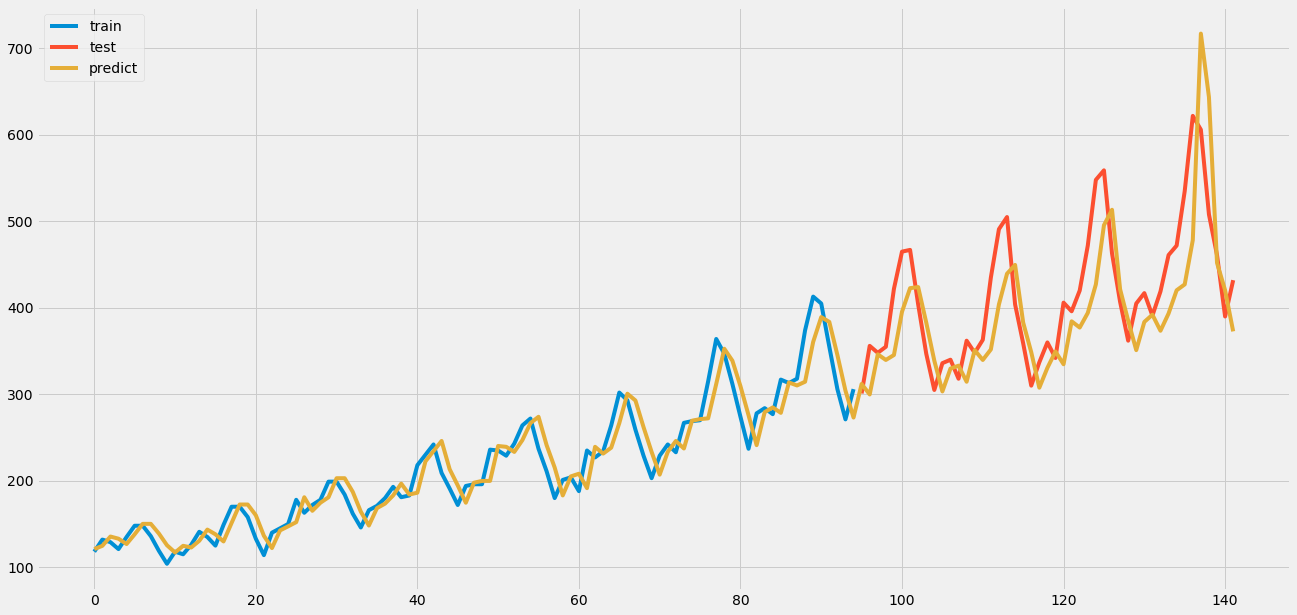

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = Regressor(analysis=analysis, regressor=GaussianProcessRegressor)
analysis.run_model(model, name='GaussianProcess')

## Recurrent Neural Network Complete Sequence

Complete sequence means that the entire sequence is input into the network and each timestep produces an output.  There are no batches, just one long sequence.

Using TensorFlow backend.
//anaconda/envs/python35/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


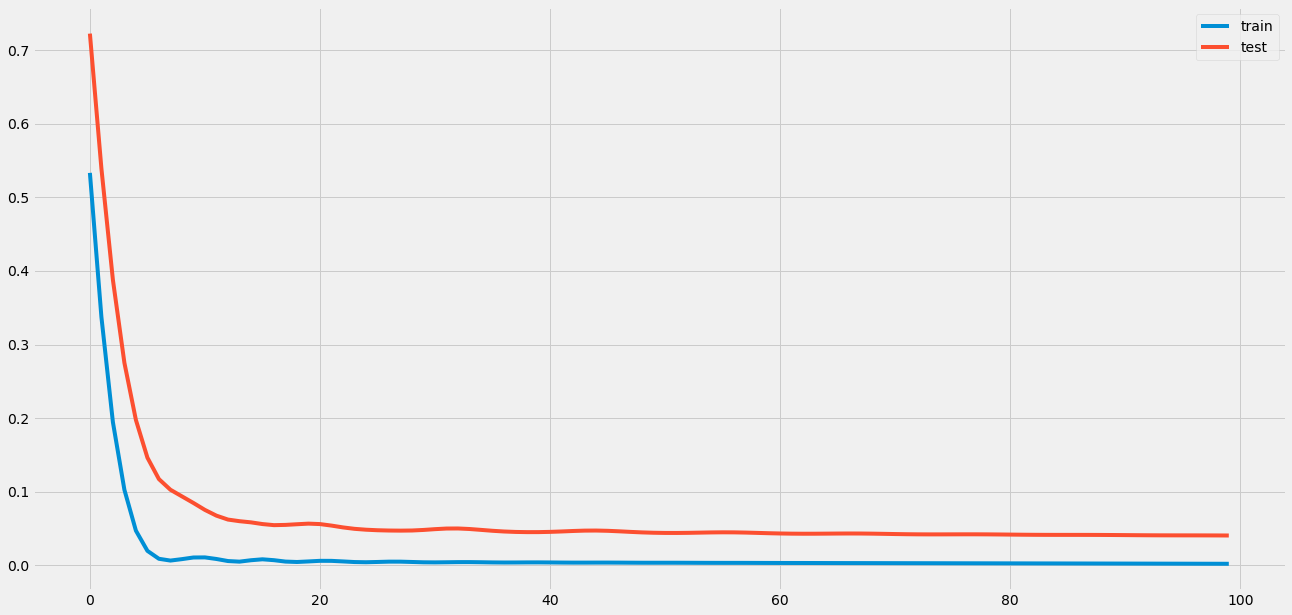

'Train Error (RMSE): 29.55920201600486  Num NaN: 0'

'Test Error (RMSE): 134.82313998652506    Num NaN: 0'

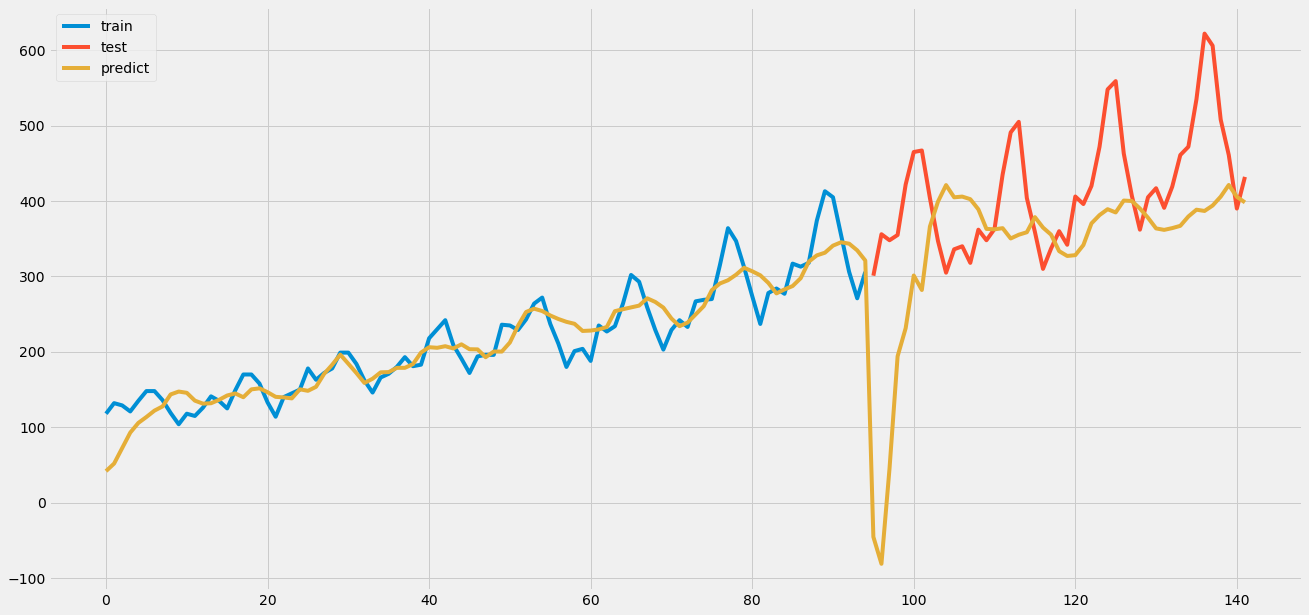

In [10]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.SimpleRNN(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mse', optimizer='adam')

model = RNNAll(analysis=analysis, model=nn, fit_config={'epochs': 100, 'shuffle': False})
analysis.run_model(model, name='RNNAll')

## Recurrent Neural Network Complete Sequence (LSTM)

Complete sequence means that the entire sequence is input into the network and each timestep produces an output.  There are no batches, just one long sequence.

//anaconda/envs/python35/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


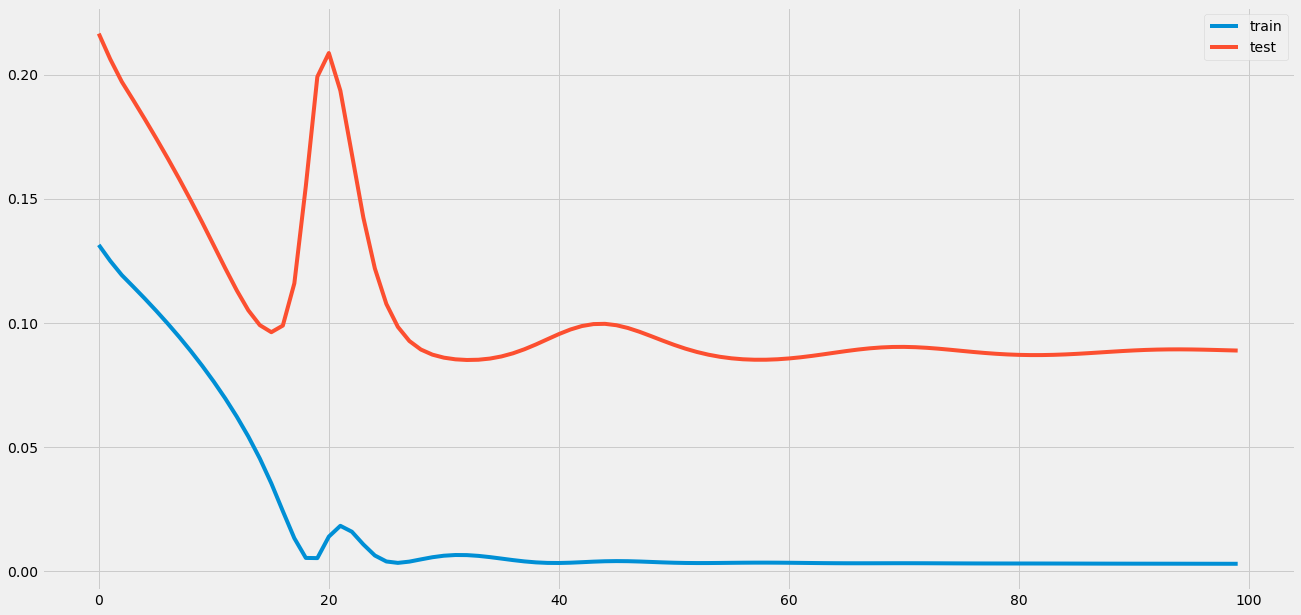

'Train Error (RMSE): 34.4119943093254  Num NaN: 0'

'Test Error (RMSE): 131.80008306949216    Num NaN: 0'

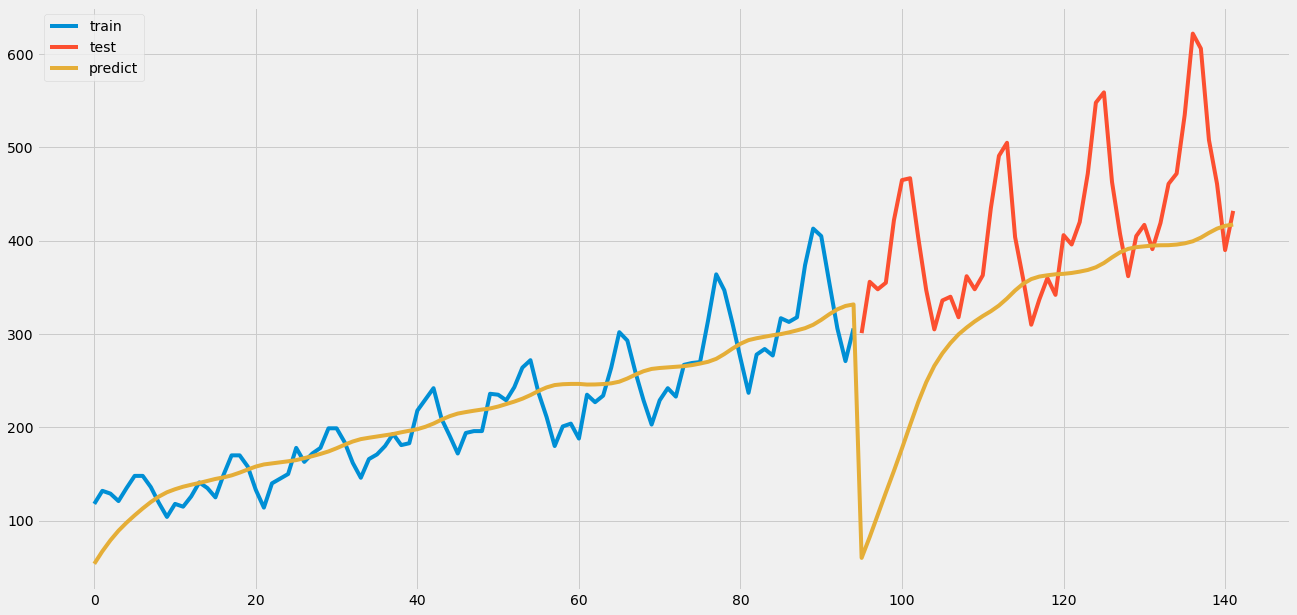

In [11]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.LSTM(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mse', optimizer='adam')

model = RNNAll(analysis=analysis, model=nn, fit_config={'epochs': 100, 'shuffle': False})
analysis.run_model(model, name='LSTMAll')

# Chunking Data

Now going to use models that require chunking.  We perform chunking by taking the time series:

x = (x0, x1, x2, x3, ...)
y = (x1, x2, x3, x4, ...)

and modifying it such that if the chunk parameter, c, is set to 3:

x = ((x0, x1, x2), (x1, x2, x3), (x2, x3, x4), ...)
y = (x3, x4, x5, ...)

This results in the first c values in not having a prediction and thus (Num NaN is > 0 and == c).



## LinearRegression

'Train Error (RMSE): 21.717891139994318  Num NaN: 2'

'Test Error (RMSE): 44.88268208097501    Num NaN: 2'

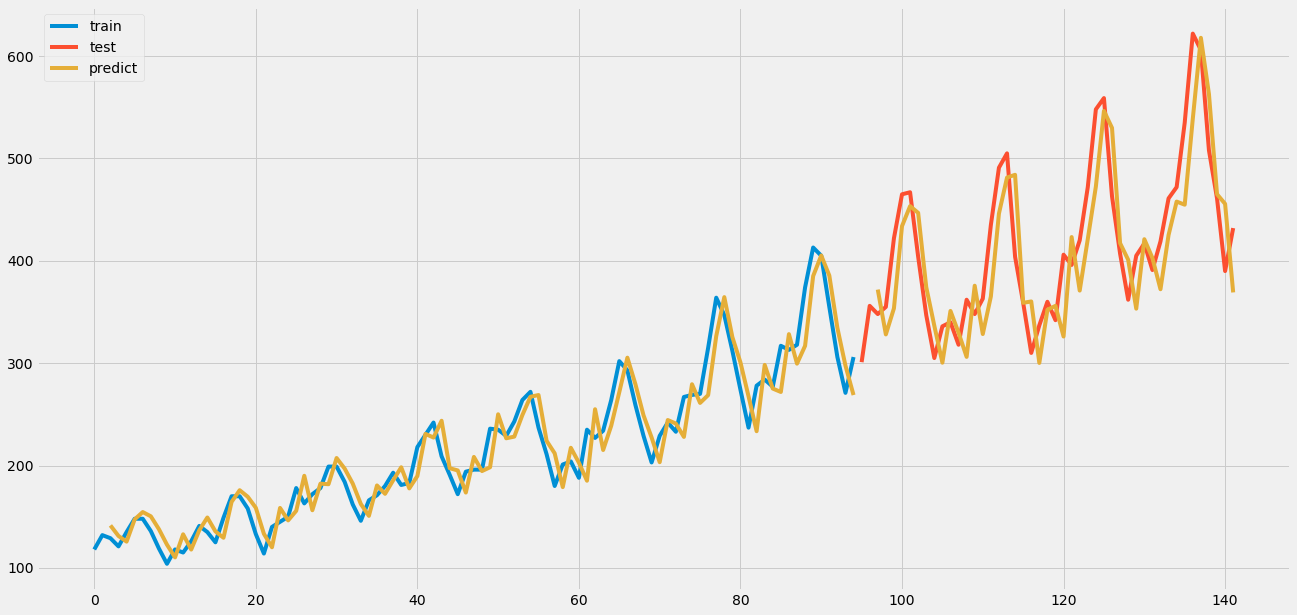

In [12]:
model = LinearRegression(analysis=analysis, num_days=NUM_DAYS)
analysis.run_model(model, name='LinearRegression')

## FeedForward Neural Network

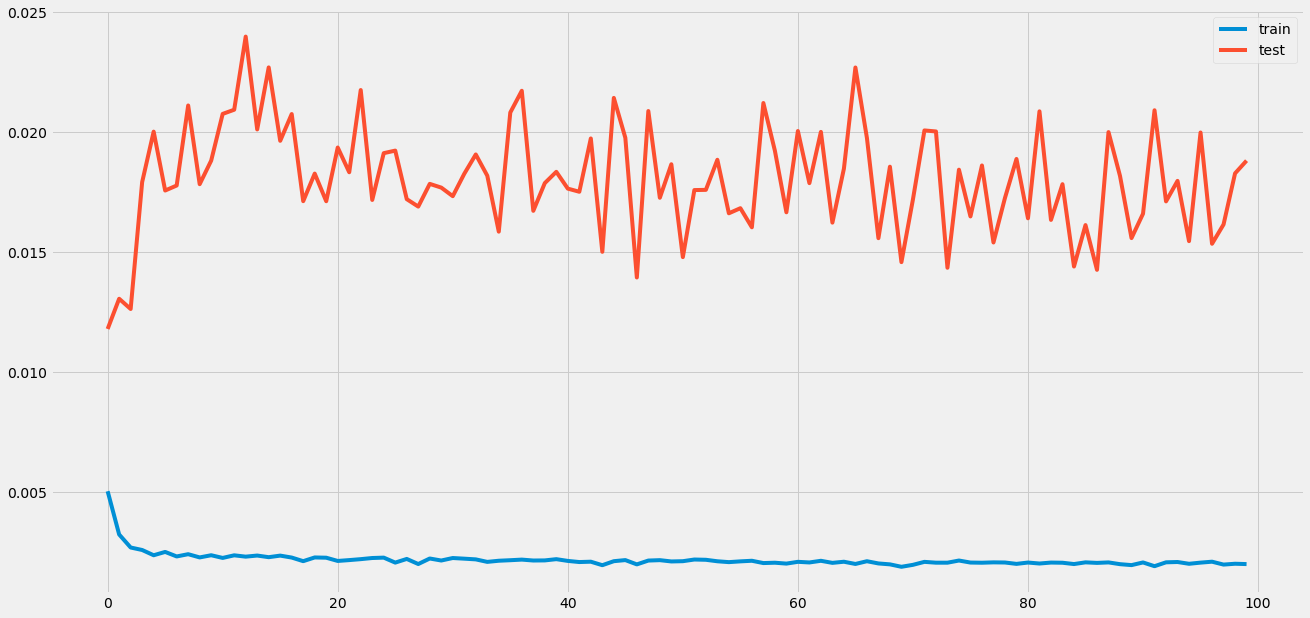

'Train Error (RMSE): 22.724362327836275  Num NaN: 2'

'Test Error (RMSE): 71.03601309201775    Num NaN: 2'

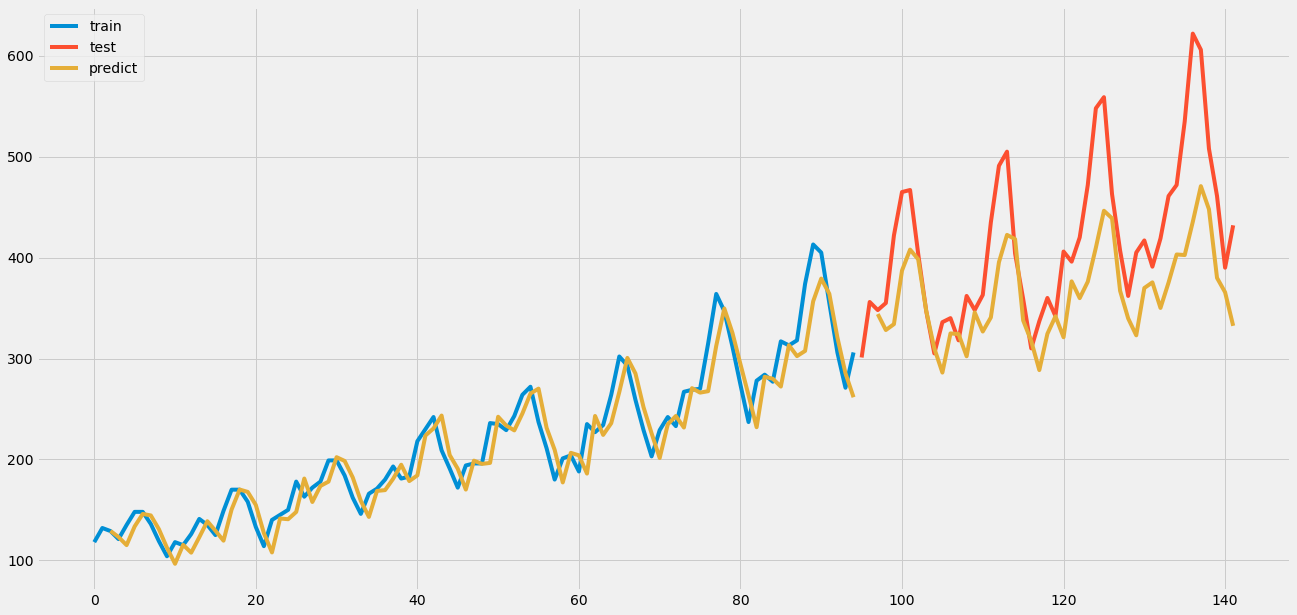

In [13]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.Dense(25, activation='tanh',
                    batch_input_shape=(None, NUM_DAYS * NUM_FEATURES)))
nn.add(layers.Dense(10, activation='tanh'))
nn.add(layers.Dense(1, activation='tanh'))
nn.compile(loss='mse', optimizer='sgd')

model = FNN(analysis=analysis, model=nn, num_days=NUM_DAYS)
analysis.run_model(model, name='FNN')


## Recurrent Neural Network with Single Output

Single output means that the chunked timesteps are input and then the final output of the RNN is used as the prediction.

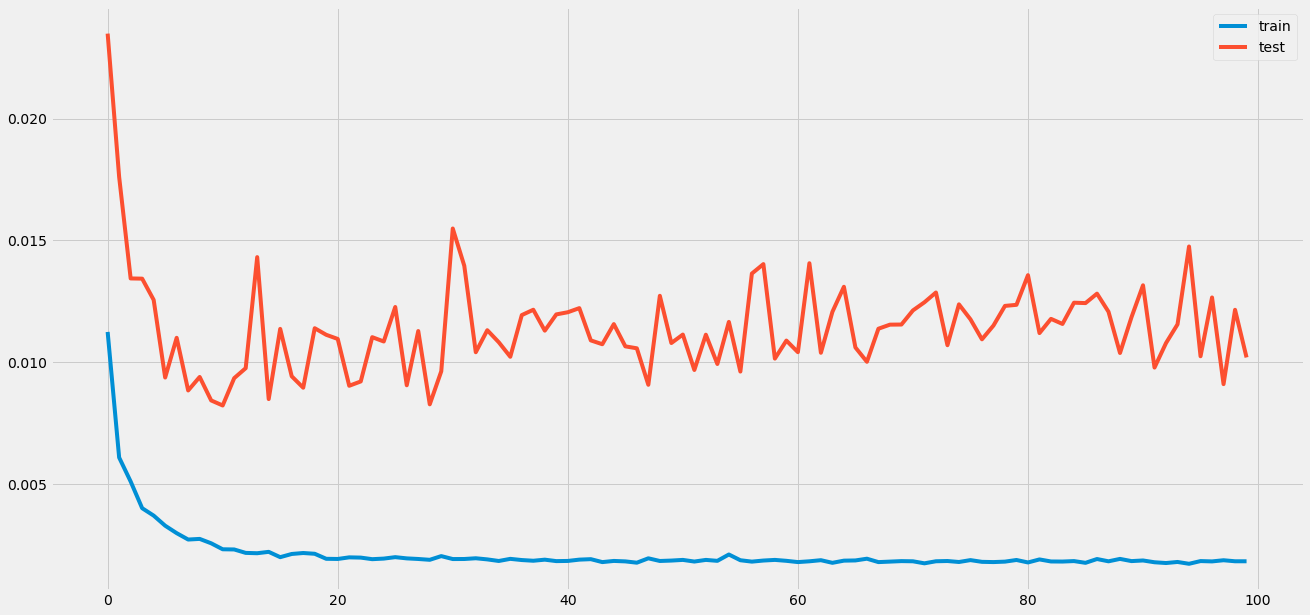

'Train Error (RMSE): 21.693592670047895  Num NaN: 2'

'Test Error (RMSE): 52.332394476261136    Num NaN: 2'

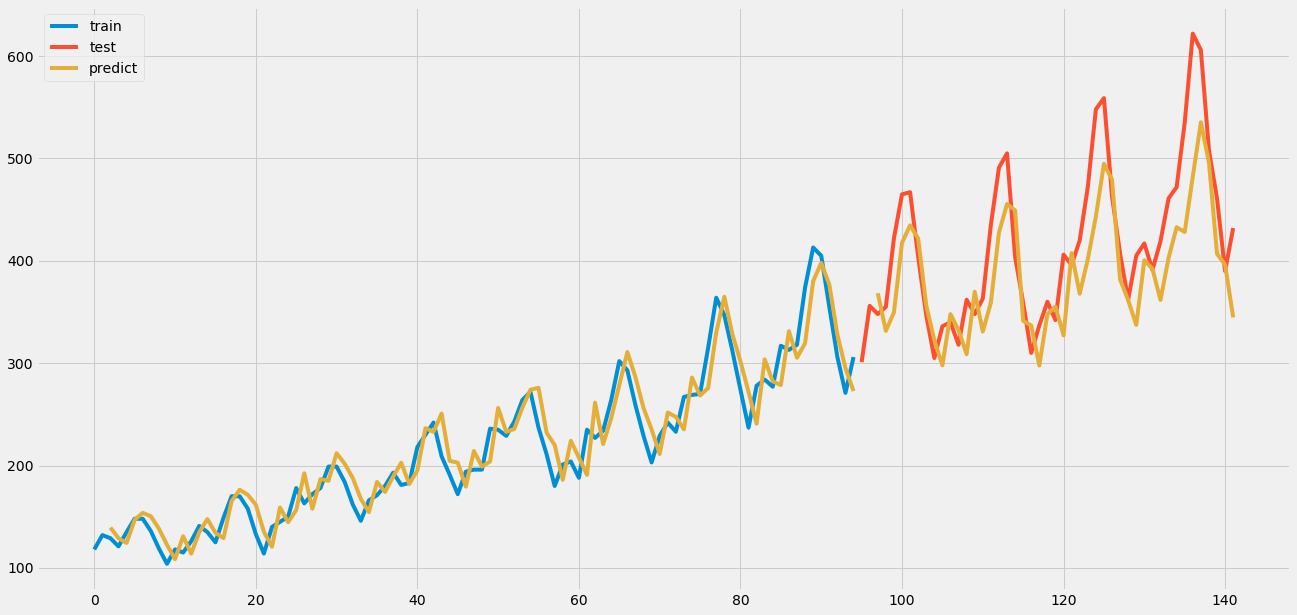

In [22]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.SimpleRNN(4, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.Dense(1))
nn.compile(loss='mse', optimizer='adam')
        
model = RNNSingle(analysis=analysis, model=nn, num_days=NUM_DAYS)
analysis.run_model(model, name='RNNSingle')

## Recurrent Neural Network with Multiple Outputs

Multiple outputs means that the chunked data is input and the output at each timestep is used.

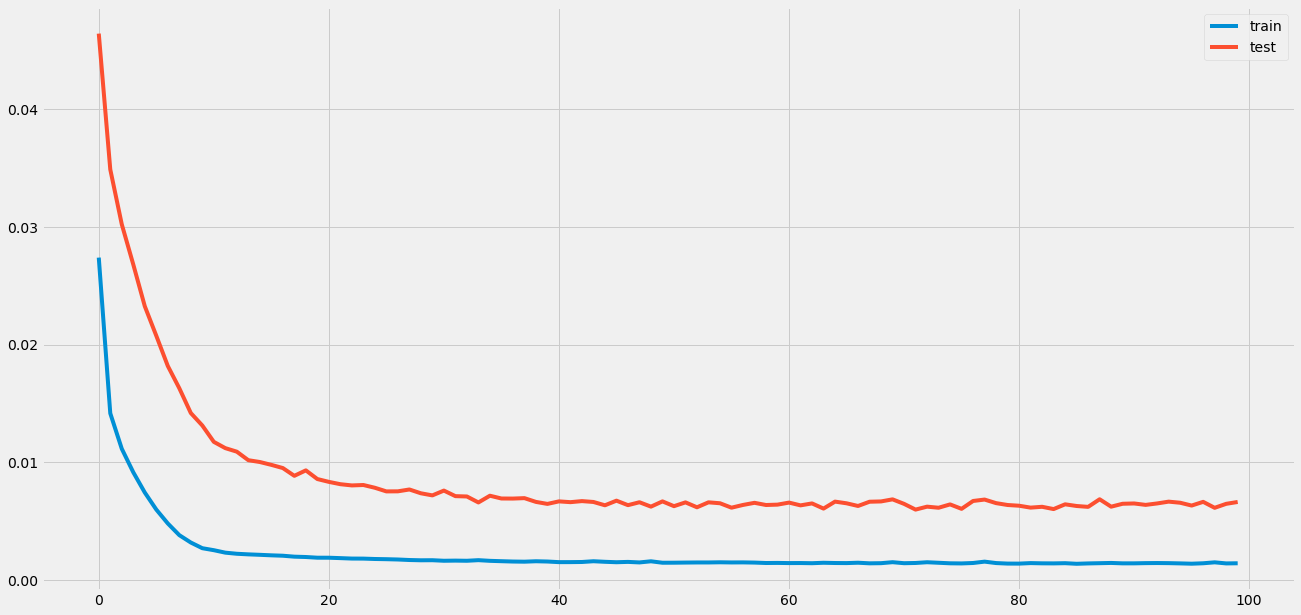

'Train Error (RMSE): 21.45464155106554  Num NaN: 0'

'Test Error (RMSE): 50.22859256186082    Num NaN: 0'

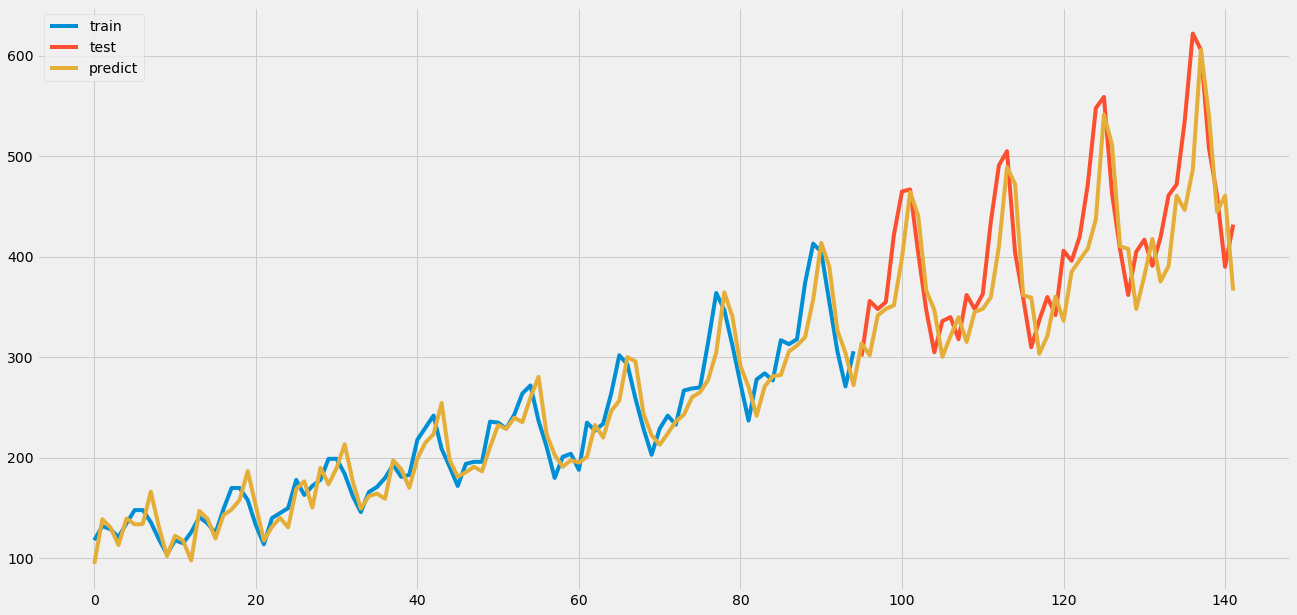

In [21]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.SimpleRNN(4, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))
nn.add(layers.TimeDistributed(layers.Dense(1)))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mse', optimizer='adam')

model = RNNMultiple(analysis=analysis, model=nn, num_days=NUM_DAYS)
analysis.run_model(model, name='RNNMultiple')

## Recurrent Neural Network with Single Output (LSTM)

Single output means that the chunked timesteps are input and then the final output of the RNN is used as the prediction.

Baseline approach gave:

> Train Score: 23.08 RMSE
>
> Test Score: 51.97 RMSE

Setting numpy random seed so that the results can be identical to the baseline approach.

In [18]:
import numpy as np
np.random.seed(7)

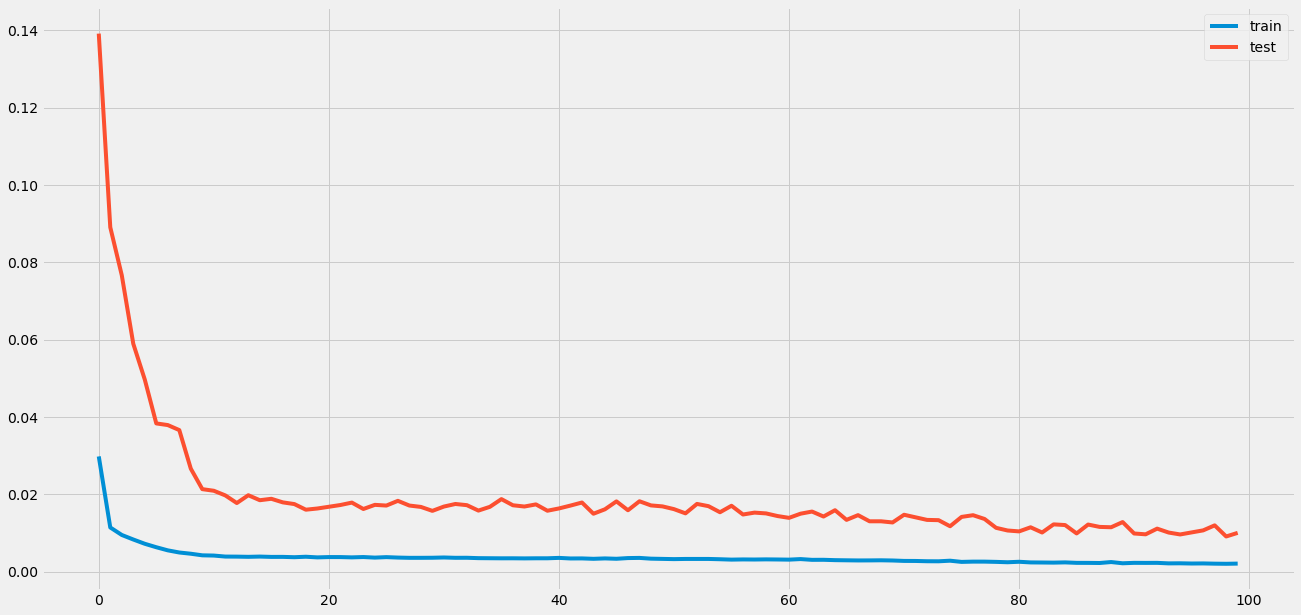

'Train Error (RMSE): 23.082867821234146  Num NaN: 2'

'Test Error (RMSE): 51.96847337418841    Num NaN: 2'

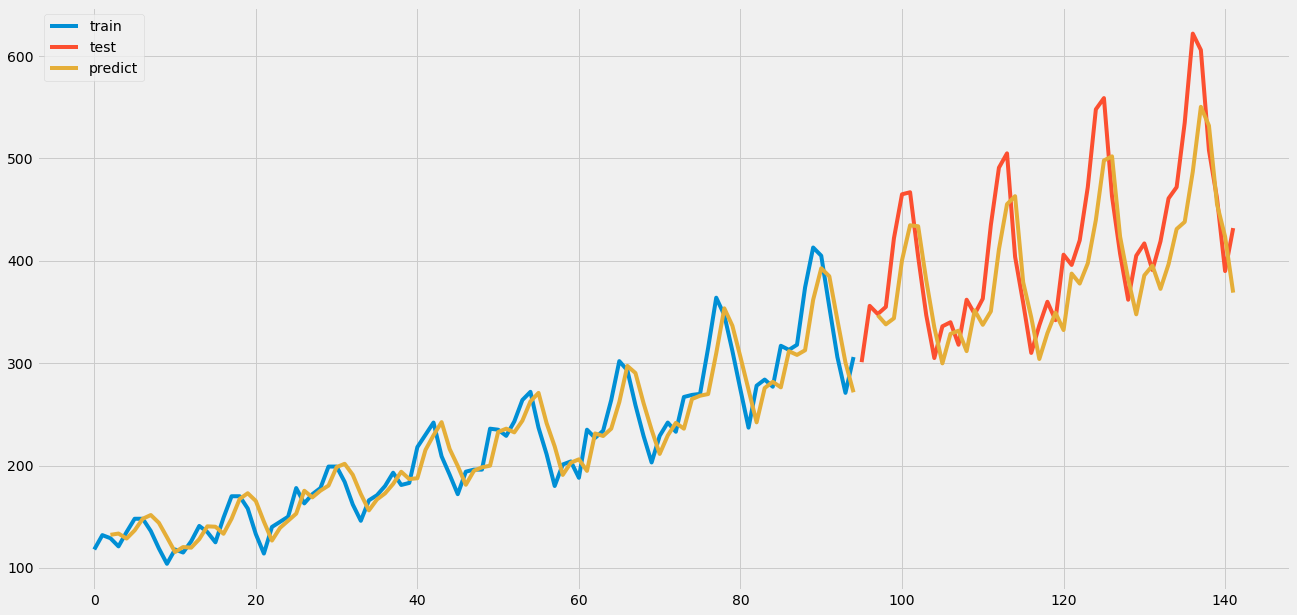

In [19]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.LSTM(4, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.Dense(1))
nn.compile(loss='mean_squared_error', optimizer='adam')
        
model = RNNSingle(analysis=analysis, model=nn, num_days=NUM_DAYS)
analysis.run_model(model, name='LSTMSingle')

## Recurrent Neural Network with Multiple Outputs (LSTM)

Multiple outputs means that the chunked data is input and the output at each timestep is used.

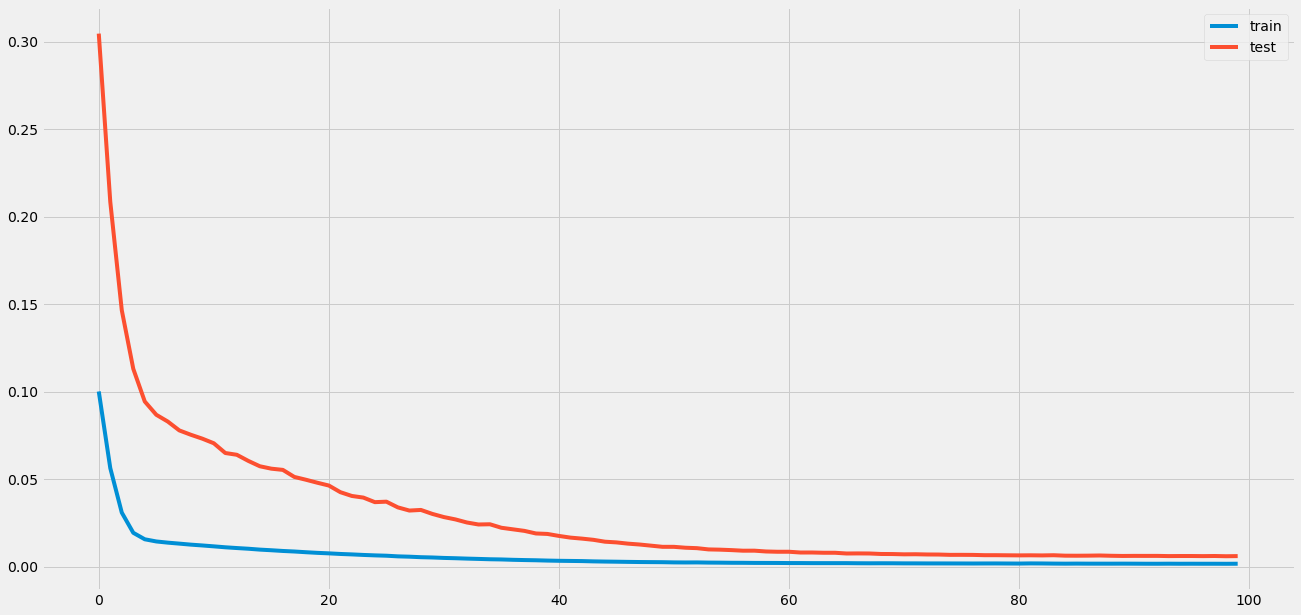

'Train Error (RMSE): 22.119879074533614  Num NaN: 0'

'Test Error (RMSE): 46.442445867285464    Num NaN: 0'

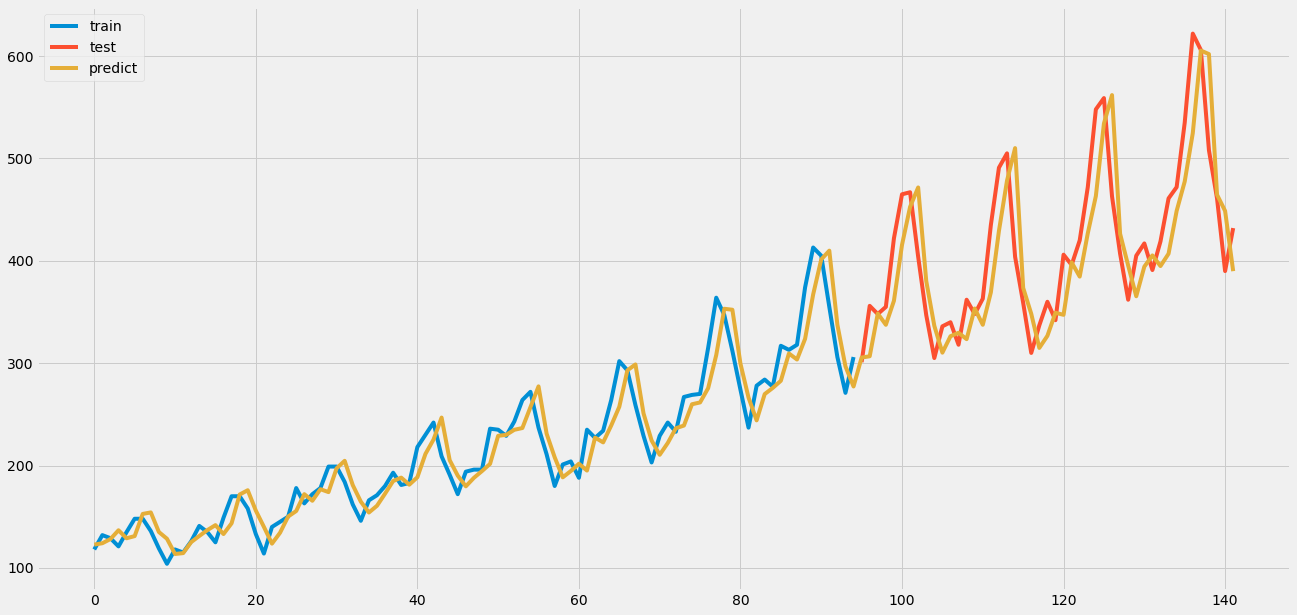

In [20]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.LSTM(4, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))
nn.add(layers.TimeDistributed(layers.Dense(1)))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mse', optimizer='adam')

model = RNNMultiple(analysis=analysis, model=nn, num_days=NUM_DAYS)
analysis.run_model(model, name='LSTMMultiple')